## Detecting Twitter Bots

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [77]:
filepath = 'C:/Users/donal/Projects/twitter-bot-detection/kaggle_data/'
file= filepath+'tweet_scrapping_for_bots.csv'

training_data = pd.read_csv(file)
bots = training_data[training_data.bot==1]
nonbots = training_data[training_data.bot==0]

### Data Analysis

#### Identifying Missing data

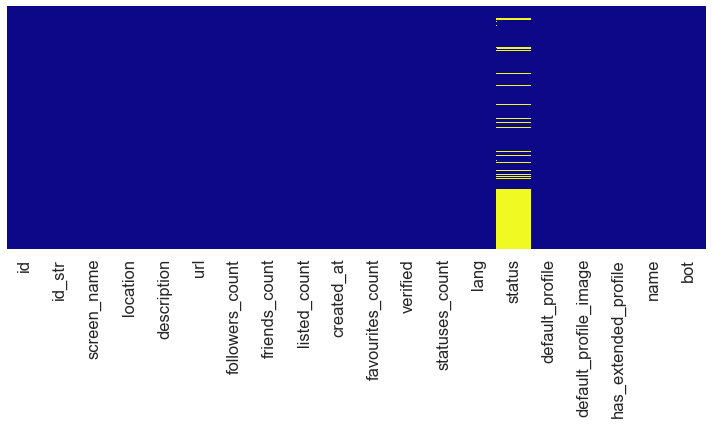

In [78]:
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='plasma')
    plt.tight_layout()
    return plt.show()

get_heatmap(training_data)

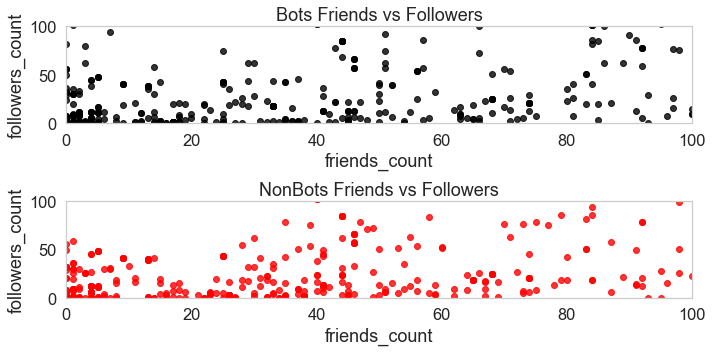

In [79]:
bots.friends_count/bots.followers_count

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers')
sns.regplot(bots.friends_count, bots.followers_count, color='black', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('NonBots Friends vs Followers')
sns.regplot(nonbots.friends_count, nonbots.followers_count, color='red', label='NonBots')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

#### Identifying Imbalance in the data

In [80]:
bots['friends_by_followers'] = bots.friends_count/bots.followers_count
bots[bots.friends_by_followers<1].shape

nonbots['friends_by_followers'] = nonbots.friends_count/nonbots.followers_count
nonbots[nonbots.friends_by_followers<1].shape

(793, 21)

(1244, 21)


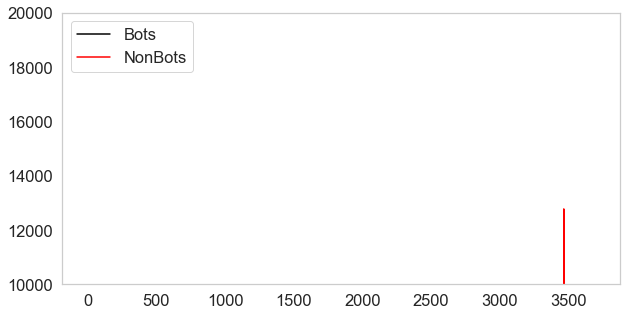

In [81]:
plt.figure(figsize=(10,5))
plt.plot(bots.listed_count, color='black', label='Bots')
plt.plot(nonbots.listed_count, color='red', label='NonBots')
plt.legend(loc='upper left')
plt.ylim(10000,20000)
print(bots[(bots.listed_count<5)].shape)

In [82]:
bots_listed_count_df = bots[bots.listed_count<16000]
nonbots_listed_count_df = nonbots[nonbots.listed_count<16000]

bots_verified_df = bots_listed_count_df[bots_listed_count_df.verified==False]
bots_screenname_has_bot_df_ = bots_verified_df[(bots_verified_df.screen_name.str.contains("bot", case=False)==True)].shape

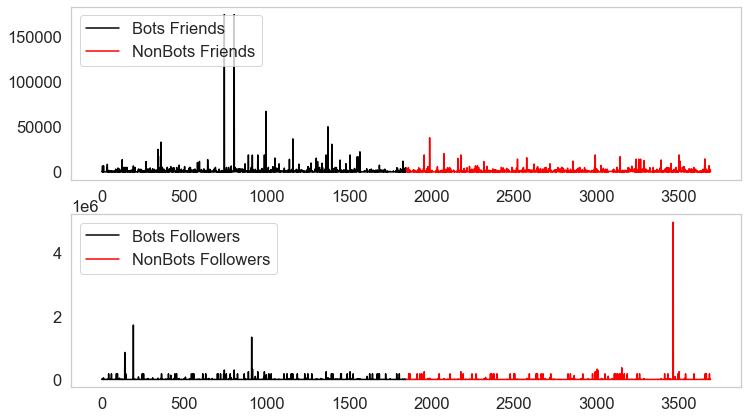

In [83]:
plt.figure(figsize=(12,7))

plt.subplot(2,1,1)
plt.plot(bots_listed_count_df.friends_count, color='black', label='Bots Friends')
plt.plot(nonbots_listed_count_df.friends_count, color='red', label='NonBots Friends')
plt.legend(loc='upper left')

plt.subplot(2,1,2)
plt.plot(bots_listed_count_df.followers_count, color='black', label='Bots Followers')
plt.plot(nonbots_listed_count_df.followers_count, color='red', label='NonBots Followers')
plt.legend(loc='upper left')

In [84]:
#bots[bots.listedcount>10000]
condition = (bots.screen_name.str.contains("bot", case=False)==True)|(bots.description.str.contains("bot", case=False)==True)|(bots.location.isnull())|(bots.verified==False)

bots['screen_name_binary'] = (bots.screen_name.str.contains("bot", case=False)==True)
bots['location_binary'] = (bots.location.isnull())
bots['verified_binary'] = (bots.verified==False)
bots.shape

(1848, 24)

In [85]:
condition = (nonbots.screen_name.str.contains("bot", case=False)==False)| (nonbots.description.str.contains("bot", case=False)==False) |(nonbots.location.isnull()==False)|(nonbots.verified==True)

nonbots['screen_name_binary'] = (nonbots.screen_name.str.contains("bot", case=False)==False)
nonbots['location_binary'] = (nonbots.location.isnull()==False)
nonbots['verified_binary'] = (nonbots.verified==True)

nonbots.shape

(1847, 24)

In [86]:
df = pd.concat([bots, nonbots])
df.shape

(3695, 24)

### Feature Independence using Spearman correlation

In [87]:
df.corr(method='spearman')

,id,id_str,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,bot,friends_by_followers,screen_name_binary,location_binary,verified_binary
id,1.000000,1.000000,-0.342626,-0.358706,-0.398517,-0.333913,-0.147923,-0.497694,0.603078,0.120616,0.442525,-0.001188,0.105339,0.019510,0.001188,0.007981
id_str,1.000000,1.000000,-0.342626,-0.358706,-0.398517,-0.333913,-0.147923,-0.497694,0.603078,0.120616,0.442525,-0.001188,0.105339,0.019510,0.001188,0.007981
followers_count,-0.342626,-0.342626,1.000000,0.572625,0.663445,0.582683,0.164390,0.597797,-0.250462,-0.242544,-0.020623,-0.012978,-0.508705,0.017450,0.012978,-0.023389
friends_count,-0.358706,-0.358706,0.572625,1.000000,0.423303,0.712303,0.125053,0.298448,-0.259645,-0.164572,-0.062045,-0.025690,0.286118,0.000633,0.025690,-0.033513
listed_count,-0.398517,-0.398517,0.663445,0.423303,1.000000,0.381023,0.171013,0.511875,-0.315478,-0.174993,-0.074049,-0.015788,-0.250772,0.002354,0.015788,-0.026479
favourites_count,-0.333913,-0.333913,0.582683,0.712303,0.381023,1.000000,0.079755,0.423707,-0.232633,-0.182032,0.028473,-0.012662,0.036004,0.004951,0.012662,-0.018334
verified,-0.147923,-0.147923,0.164390,0.125053,0.171013,0.079755,1.000000,0.107023,-0.155272,-0.017348,-0.066144,0.032163,-0.124838,-0.033656,-0.032163,-0.031557
statuses_count,-0.497694,-0.497694,0.597797,0.298448,0.511875,0.423707,0.107023,1.000000,-0.365904,-0.176719,-0.218305,-0.012356,-0.449180,0.010968,0.012356,-0.019510
default_profile,0.603078,0.603078,-0.250462,-0.259645,-0.315478,-0.232633,-0.155272,-0.365904,1.000000,0.088769,0.198978,-0.001786,0.119654,0.005878,0.001786,0.008854
default_profile_image,0.120616,0.120616,-0.242544,-0.164572,-0.174993,-0.182032,-0.017348,-0.176719,0.088769,1.000000,-0.001006,0.016317,0.114950,-0.025352,-0.016317,0.017423


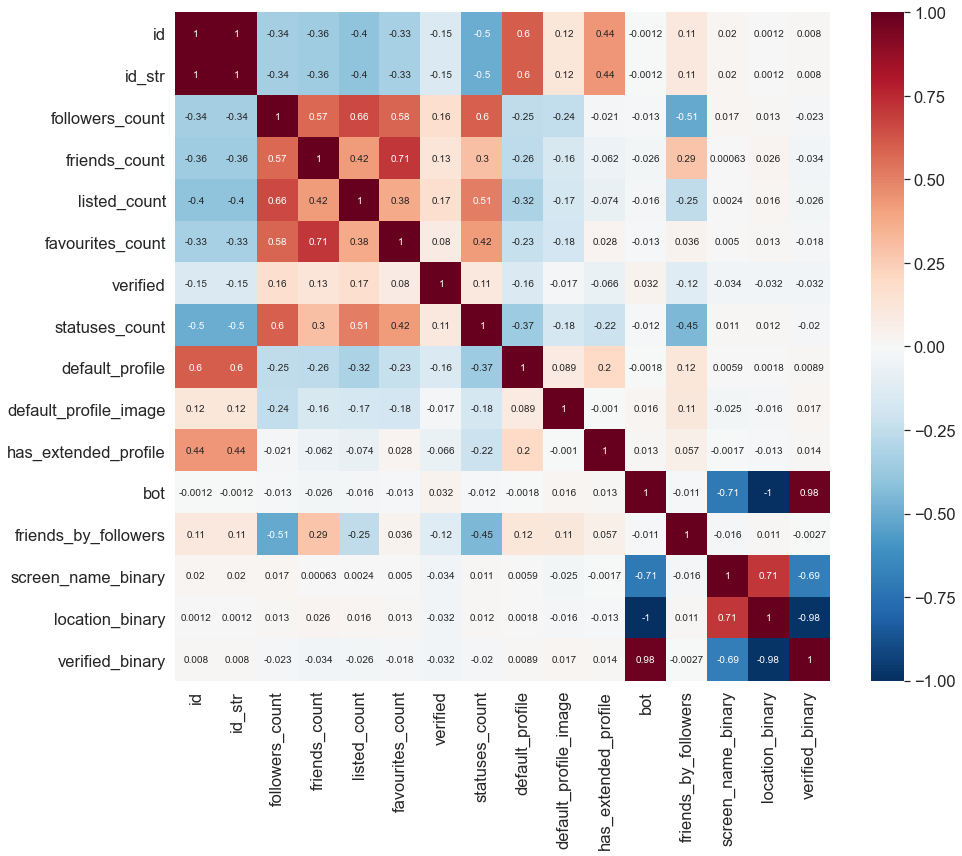

In [88]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(method='spearman'), cmap='RdBu_r', annot=True)
plt.tight_layout()
plt.show()

Result:
- There is no correlation between **id, statuses_count, default_profile, default_profile_image** and target variable.
- There is strong correlation between **verified, listed_count, friends_count, followers_count** and target variable.
- We cannot perform correlation for categorical attributes. So we will take **screen_name, name, description, status** into feature engineering. While use **verified, listed_count** for feature extraction.

#### Performing Feature Engineering

In [89]:
filepath = 'C:/Users/donal/Projects/twitter-bot-detection/kaggle_data/'
file= open(filepath+'tweet_scrapping_for_bots.csv', mode='r', encoding='utf-8', errors='ignore')

training_data = pd.read_csv(file)

bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
            
training_data['screen_name_binary'] = training_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['name_binary'] = training_data.name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['description_binary'] = training_data.description.str.contains(bag_of_words_bot, case=False, na=False)
training_data['status_binary'] = training_data.status.str.contains(bag_of_words_bot, case=False, na=False)

#### Performing Feature Extraction

In [90]:
training_data['listed_count_binary'] = (training_data.listed_count>20000)==False
features = ['screen_name_binary', 'name_binary', 'description_binary',  'verified', 'followers_count', 'friends_count', 'statuses_count', 'status_binary', 'listed_count_binary', 'bot']

#'status_binary',

## Implementing Different Models

#### Decision Tree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

dt = dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Training Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.65932
Test Accuracy: 0.59152


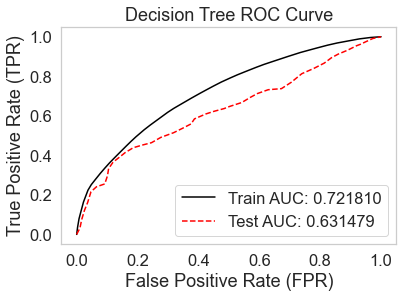

In [92]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = dt.predict_proba(X_train)
scores_test = dt.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_dt_train, tpr_dt_train, color='black', label='Train AUC: %5f' %auc(fpr_dt_train, tpr_dt_train))
plt.plot(fpr_dt_test, tpr_dt_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_dt_test, tpr_dt_test))
plt.title("Decision Tree ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

Result: Decision Tree gives very good performance and generalizes well. But it may be overfitting as AUC is 0.937, so we will try other models.

#### Multinomial Naive Bayes Classifier

In [93]:
from sklearn.naive_bayes import MultinomialNB

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

mnb = MultinomialNB(alpha=0.0009)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

mnb = mnb.fit(X_train, y_train)
y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)

print("Training Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.48801
Test Accuracy: 0.49504


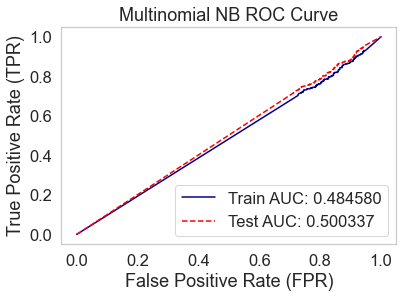

In [94]:
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = mnb.predict_proba(X_train)
scores_test = mnb.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_mnb_train, tpr_mnb_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_mnb_test, tpr_mnb_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_mnb_train, tpr_mnb_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_mnb_train, tpr_mnb_train))
plt.plot(fpr_mnb_test, tpr_mnb_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_mnb_test, tpr_mnb_test))
plt.title("Multinomial NB ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

Result: Clearly, Multinomial Niave Bayes peforms poorly and is not a good choice as the Train AUC is just 0.556 and Test is 0.555.

#### Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=1)

rf = rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Training Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.88464
Test Accuracy: 0.64865


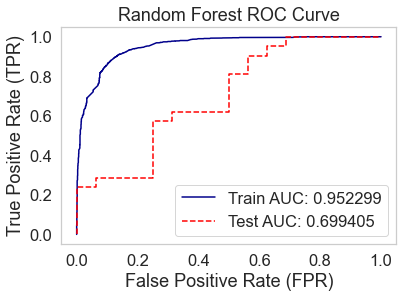

In [96]:
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = rf.predict_proba(X_train)
scores_test = rf.predict_proba(X_test)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_rf_train, tpr_rf_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
plt.plot(fpr_rf_test, tpr_rf_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

Support Vector Machine

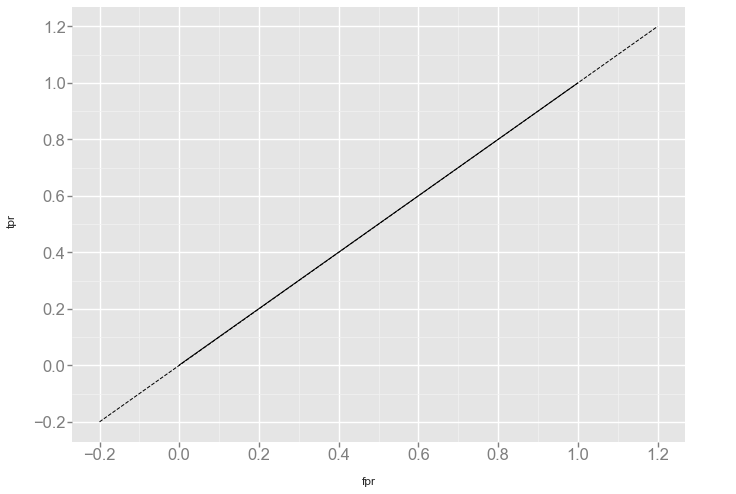

<ggplot: (164854542499)>


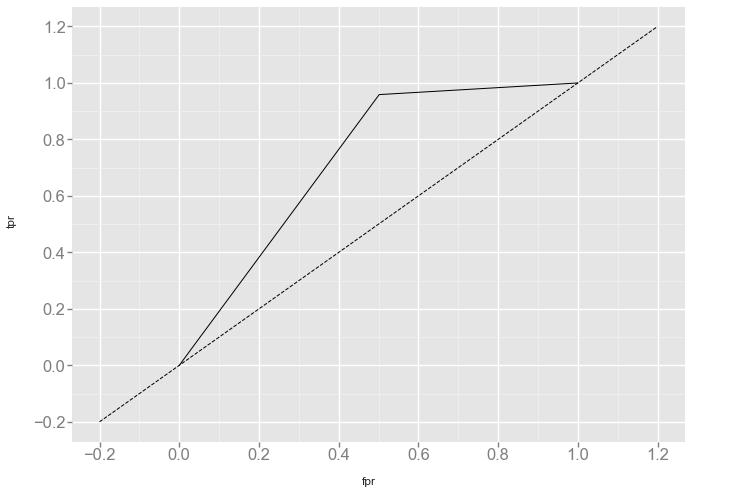

<ggplot: (164855024975)>


In [97]:
from sklearn import svm
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import cross_val_score
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from ggplot import *

filepath = 'C:/Users/donal/Projects/twitter-bot-detection/kaggle_data/'
file= filepath+'training_data_2_csv_UTF.csv'

training_data = pd.read_csv(file)


bots = training_data[training_data.bot==1]
bots = bots[['screen_name','description','followers_count','friends_count','favourites_count','verified','statuses_count','default_profile','default_profile_image','has_extended_profile','name','bot']]

non_bots = training_data[training_data.bot==0]
non_bots = non_bots[['screen_name','description','followers_count','friends_count','favourites_count','verified','statuses_count','default_profile','default_profile_image','has_extended_profile','name','bot']]


a= pd.concat([bots,non_bots])
a = a.dropna(how = 'any')
le = preprocessing.LabelEncoder()
le.fit(a.verified)
a.verified = le.transform(a.verified)
a.default_profile = le.transform(a.default_profile)
a.default_profile_image = le.transform(a.default_profile_image)
a.has_extended_profile = le.transform(a.has_extended_profile)

train_features = a[['followers_count','verified','friends_count','favourites_count','statuses_count','default_profile','default_profile_image','has_extended_profile']]
train_labels = a['bot'].values

X_train, X_test, y_train, y_test = train_test_split(train_features,train_labels, test_size=.75,
                                                    random_state=0)

clf= svm.SVC()
clf.fit(X_train,y_train)

clf_Mnb = MultinomialNB()
clf_Mnb.fit(X_train,y_train)


y_pred = clf.predict(X_test)
fpr,tpr , _ = metrics.roc_curve(y_test,y_pred)

df_roc = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
g = ggplot(df_roc, aes(x='fpr', y='tpr')) +    geom_line() +    geom_abline(linetype='dashed')
print(g)


y_pred = clf_Mnb.predict(X_test)
fpr,tpr , _ = metrics.roc_curve(y_test,y_pred)

df_roc = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
g = ggplot(df_roc, aes(x='fpr', y='tpr')) +    geom_line() +    geom_abline(linetype='dashed')
print(g)


# K-nearest neighbor

In [98]:
import pandas as pd
import numpy as np
import re
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [99]:
filepath = 'C:/Users/donal/Projects/twitter-bot-detection/kaggle_data/'
file= filepath+'tweet_scrapping_for_bots.csv'

df = pd.read_csv(file, encoding='latin1')
acc_df = df.replace(np.nan, '', regex=True)
acc_df.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,3.114766e+09,3.114766e+09,b'simplymyAZself',b'',"b'I work, I geek, I fitness, and I mom. Faves ...",b'How many followers do you need to get out of...,122,209,13,2022-03-22 23:17:44+00:00,10753,False,4433,b'en',"{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,b'Princess of Alderaan',1
1,5.907274e+08,5.907274e+08,b'KouheiS_bot',b'',"b""Ah hi ^^: I'm the bot for the utau Shimizu K...","b""I.. ah umm.. There are these girls that foll...",12,5,1,2022-03-22 23:15:57+00:00,0,False,43792,b'en',,True,False,False,b'\xe6\xb8\x85\xe6\xb0\xb4\xe5\xba\xb7\xe5\xb9...,1
2,9.620000e+17,9.620000e+17,b'MamaJmad',b'',b'',b'@tylerperry Some people see this reply and c...,11,177,0,2022-03-22 23:15:22+00:00,8,False,2353,b'en',"{'retweeted': False, 'is_quote_status': False,...",True,True,False,b'Martine',1
3,5.571003e+08,5.571003e+08,b'ReviewDork',"b'Florida, USA'",b'Your favorite Youtuber - I didn\xe2\x80\x99t...,b'Wowwwwwww \xe2\x80\xa6 had my twitter follow...,29814,3015,105,2022-03-19 22:45:44+00:00,22385,False,6460,b'en',Construction of human anti-tetanus single-chai...,False,False,True,b'ReviewDork',1
4,1.190000e+18,1.190000e+18,b'Julian11810',"b'Lake County, Indiana, USA'","b""~ Christian ~ Patriot ~\n~ Stand with Trump ...","b""@Carlson75Maria Don't do it!\nToo many freak...",6407,6498,3,2022-03-19 22:45:40+00:00,30014,False,25472,b'en',,True,False,True,b'Julian Carden',1


# Custom Cleaning Function to clean data

In [100]:
def cleanData(acc_df):
    #Set screen_name = 1 if screen_name contains bot
    acc_df_screen_name = pd.DataFrame(acc_df['screen_name'])
    acc_df_screen_name_lower = acc_df_screen_name['screen_name'].str.lower()
    acc_df['screen_name']=acc_df_screen_name_lower.str.contains('bot')*1
    print('screen_name cleaned')

    #Set location = 1 if location is blank
    acc_df['location']=[(((acc_df.iloc[i]['location']=='')==True)*1) for i in range (len(acc_df))]
    print('location cleaned')
    #acc_df

    # Set description = 1 if it contains words like bot, robot, artificial, intelligence, neural, network,  etc
    words=['bot','robot', 'artificial', 'intelligence', 'neural', 'network','automatic'] #words to be searched in the description
    pat = '|'.join(map(re.escape, words)) #mapping function
    acc_df['description'] = acc_df['description'].str.lower() #converting string to lower case
    acc_df['description']=acc_df.description.str.contains(pat)*1 
    print('description cleaned')
    #acc_df

    #set verified =1 if the account is not verified
    acc_df['verified'] = [((acc_df.iloc[i]['verified']==False) or (acc_df.iloc[i]['verified']=='FALSE'))*1 for i in range (0,len(acc_df))]

    print('verfied cleaned')
    #acc_df['verified']

    #set default_profile =1 if the account has a default_profile
    acc_df['default_profile'] = [(acc_df.iloc[i]['default_profile']==True or acc_df.iloc[i]['default_profile']=="TRUE")*1 for i in range (0,len(acc_df))]
    #acc_df['default_profile'] = [(acc_df.iloc[i]['default_profile']=="TRUE")*1 for i in range (0,len(acc_df))]
    print('default_profile cleaned')
    #acc_df

    #set default_profile_image =1 if the account has a default_profile_image
    acc_df['default_profile_image'] = [(acc_df.iloc[i]['default_profile_image']==True or acc_df.iloc[i]['default_profile_image']=='TRUE')*1 for i in range (0,len(acc_df))]
    print('default_profile_image cleaned')
    #acc_df

    #set has_extended_profile =1 if the account does not have a has_extended_profile
    acc_df['has_extended_profile'] = [(acc_df.iloc[i]['has_extended_profile']==False or acc_df.iloc[i]['has_extended_profile']=='FALSE')*1 for i in range (0,len(acc_df))]
    print('has_extended_profile cleaned')
    #acc_df
    
    #set bot =1 if the account is a bot account
    acc_df['bot'] = [(acc_df.iloc[i]['bot']==True)*1 for i in range (0,len(acc_df))]
    print('bot cleaned')
    #acc_df

    #filling blank rows of dataframe
    header_value = ['followers_count','listed_count','friends_count','favourites_count','statuses_count']
    for header_name in header_value:
        temp = list()
        for i in range(len(acc_df)):
            if acc_df.iloc[i][header_name]=='':
                temp.append(0)
            else:
                temp.append(int(acc_df.iloc[i][header_name]))
        acc_df[header_name]= temp
    #print('Cleaned columns: followers_count, listed_count, friends_count, favorites_count, statuses_count')
    
    #standardize the continuous parameter values
    header_value = ['followers_count','listed_count','friends_count','favourites_count','statuses_count']
    for header_name in header_value:
        temp = list()
        for i in range(len(acc_df)):
            temp.append((acc_df.iloc[i][header_name]-min(acc_df[header_name]))/(max(acc_df[header_name])-min(acc_df[header_name])))
        acc_df[header_name]= temp

    #'favorites_count','followers_count','listedcount'
    acc_df = acc_df.filter(['screen_name','location','description','listed_count','friends_count','followers_count','favourites_count','verified','statuses_count','default_profile','default_profile_image','has_extended_profile','name','bot'], axis=1)
    return acc_df
    
    
    

In [101]:
acc_df=cleanData(acc_df) #calling cleaning function
print(acc_df.shape)
acc_df.to_csv('train.csv')
acc_df = acc_df.filter(['friends_count','screen_name','location','description','followers_count','listed_count','bot'], axis=1)
acc_df.head()

screen_name cleaned
location cleaned
description cleaned
verfied cleaned
default_profile cleaned
default_profile_image cleaned
has_extended_profile cleaned
bot cleaned
(3695, 14)


,friends_count,screen_name,location,description,followers_count,listed_count,bot
0,0.001195,0,0,0,0.000025,0.001018,1
1,0.000029,1,0,1,0.000002,0.000078,1
2,0.001012,0,0,0,0.000002,0.000000,1
3,0.017234,0,0,0,0.005990,0.008220,1
4,0.037143,0,0,0,0.001287,0.000235,1


# KNN implementation for neighbors 1-50

Neighbor: 1 
Accuracy: 0.5304957815210042


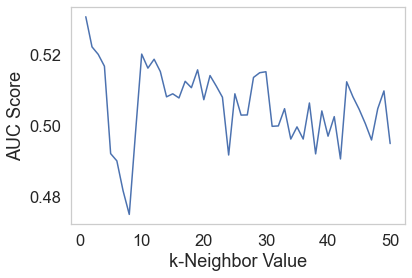

In [102]:
# create design matrix X and target vector y
X = np.array(acc_df.iloc[:, 0:len(acc_df.columns)-1])
y = np.array(acc_df['bot'])

# spliting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

neighbor = list(range(1,51))
roc_auc=list()
for i in neighbor:
    knn = KNeighborsClassifier(n_neighbors=i)
    pred = knn.fit(X_train, y_train).predict(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc.append(metrics.auc(fpr, tpr))
    
print('Neighbor:',roc_auc.index(max(roc_auc))+1,'\nAccuracy:',max(roc_auc))
plt.plot(neighbor, roc_auc)
plt.xlabel('k-Neighbor Value')
plt.ylabel('AUC Score')
plt.show()

# Performing 10 Fold CV

In [103]:
neighbor = list(range(1,51))
CV = list(range(1,11))
score=list()
roc_auc = list()
roc_auclist= list()
acclist = list()
X_folds = np.array_split(acc_df.iloc[:, 0:len(acc_df.columns)-1], 10)
y_folds = np.array_split(acc_df['bot'],10)

for i in neighbor:
    roc_auc.append(list())
    for k in CV:
        X_train = list(X_folds)
        X_test  = X_train.pop(k-1)
        X_train = np.concatenate(X_train)
        y_train = list(y_folds)
        y_test  = y_train.pop(k-1)
        y_train = np.concatenate(y_train)

        knn = KNeighborsClassifier(n_neighbors=i)
        fit = knn.fit(X_train, y_train)
        pred = fit.predict(X_test)
        score.append(accuracy_score(y_test,pred))
    acclist.append(np.mean(score))

# Ploting Neighbors vs 10-Fold Cross validation Accuracy Score

Maximum accuracy achieved at Neighbor value(k): 1 
Mean Accuracy: 0.44108987035816305


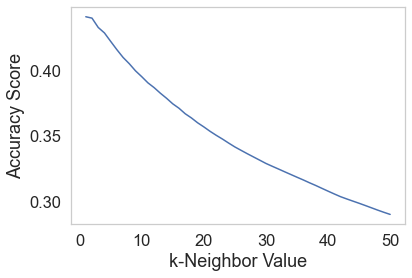

In [104]:
print('Maximum accuracy achieved at Neighbor value(k):',acclist.index(max(acclist))+1,'\nMean Accuracy:',max(acclist))
plt.plot(neighbor, acclist)
plt.xlabel('k-Neighbor Value')
plt.ylabel('Accuracy Score')
plt.show()

# Refitting Model

Mean score after performing 10-fold CV with 1 neighbor is: 0.44108987035816305


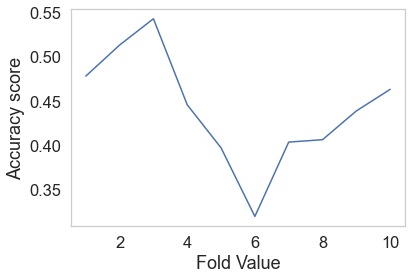

In [105]:
CV = list(range(1,11))
predictionlist = list()
refitscore = list()
X_folds = np.array_split(acc_df.iloc[:, 0:len(acc_df.columns)-1], 10)
y_folds = np.array_split(acc_df['bot'],10)

for k in CV:
    X_train = list(X_folds)
    X_test  = X_train.pop(k-1)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k-1)
    y_train = np.concatenate(y_train)

    knn = KNeighborsClassifier(n_neighbors=acclist.index(max(acclist))+1)
    knn1 = knn.fit(X_train, y_train)
    pred = knn1.predict(X_test)
    predictionlist.append(pred)
    refitscore.append(accuracy_score(pred,y_test))

print('Mean score after performing 10-fold CV with',acclist.index(max(acclist))+1,'neighbor is:',np.mean(refitscore))
plt.plot(np.arange(1,11), refitscore)
plt.xlabel('Fold Value')
plt.ylabel('Accuracy score')
plt.show()
#testlist.append(y_test)
#predictionlist
#pred

pred = [item for predictionlist in predictionlist for item in predictionlist]

# Results

Confusion Matrix:
 [[ 750 1097]
 [ 968  880]]

Classification report:
               precision    recall  f1-score   support

           0       0.44      0.41      0.42      1847
           1       0.45      0.48      0.46      1848

    accuracy                           0.44      3695
   macro avg       0.44      0.44      0.44      3695
weighted avg       0.44      0.44      0.44      3695



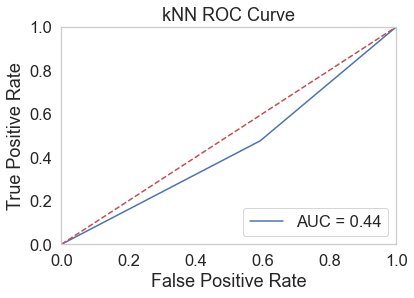

0.4411271817877124

In [106]:
print('Confusion Matrix:\n',confusion_matrix(acc_df['bot'],pred))

print('\nClassification report:\n',classification_report(acc_df['bot'], pred))


fpr, tpr, threshold = metrics.roc_curve(acc_df['bot'], pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('kNN ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc